In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px

## Importing the datasets ##

In [6]:
df1 = pd.read_csv("./Data/brasil-reasl-estate-1.csv")

In [22]:
df2 = pd.read_csv("./Data/brasil-reasl-estate-2.csv")

Both datasets are a pair needed to be combined horizontally. I'll most likely use a pd.concat.

### Starting operations, exploration, and warngling (if needed) with df1

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12833 entries, 0 to 12832
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     12833 non-null  int64  
 1   property_type  12833 non-null  object 
 2   state          12833 non-null  object 
 3   region         12833 non-null  object 
 4   lat            12833 non-null  float64
 5   lon            12833 non-null  float64
 6   area_m2        11293 non-null  float64
 7   price_brl      12833 non-null  float64
dtypes: float64(4), int64(1), object(3)
memory usage: 802.2+ KB


In [8]:
df1.head()

,Unnamed: 0,property_type,state,region,lat,lon,area_m2,price_brl
0,1,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,2,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,3,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,4,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,5,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [9]:
# Getting read of the "Unnamed: 0" column in df1. It is not needed
df1.drop(columns=["Unnamed: 0"], inplace=True)

In [10]:
df1.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [ ]:
All columsn in df1 looks good. Now exploring df2

In [11]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               12834 non-null  int64 
 1   property_type            12834 non-null  object
 2   place_with_parent_names  12834 non-null  object
 3   region                   12834 non-null  object
 4   lat-lon                  11551 non-null  object
 5   area_m2                  12834 non-null  int64 
 6   price_usd                12834 non-null  object
dtypes: int64(2), object(5)
memory usage: 702.0+ KB


Hmmm. Df2 appears to differ a bit from df1. 
First, the price of properties in df1 are in brl while of df2 are in usd.
Second: The price here also appears to be an object datatype. I should explor that further.
Third: There appears not to be a state column in df2
Fourth: the "Unnamed: 0" column issues as in df1
Fifth: Lat and long also appear to be combined and appear as a combined object type instead of as individual integers

In [16]:
# Checking out df2
df2.head()

,Unnamed: 0,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd
0,1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85"
1,2,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37"
2,3,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45"
3,4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20"
4,5,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71"


In [23]:
df2.drop(columns=["Unnamed: 0"], inplace=True)

In [27]:
df2.place_with_parent_names.str.split("|").head()[2]

['', 'Brasil', 'Alagoas', 'Maceió', '']

In [30]:
df2["place_with_parent_names"].str.split("|", expand=True).head()

,0,1,2,3,4,5
0,,Brasil,Alagoas,Maceió,,None
1,,Brasil,Alagoas,Maceió,,None
2,,Brasil,Alagoas,Maceió,,None
3,,Brasil,Alagoas,Maceió,,None
4,,Brasil,Alagoas,Maceió,,None


In [31]:
df2["state"] = df2["place_with_parent_names"].str.split("|", expand=True)[2]

In [32]:
df2.head()

,property_type,place_with_parent_names,region,lat-lon,area_m2,price_usd,state
0,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",Alagoas
1,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",Alagoas
2,house,|Brasil|Alagoas|Maceió|,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",Alagoas
3,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.622837,-35.719556",99,"$146,013.20",Alagoas
4,apartment,|Brasil|Alagoas|Maceió|,Northeast,"-9.654955,-35.700227",55,"$101,416.71",Alagoas


In [33]:
df2.drop(columns=["place_with_parent_names"], inplace=True)
df2.head()

,property_type,region,lat-lon,area_m2,price_usd,state
0,apartment,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",Alagoas
1,apartment,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",Alagoas
2,house,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",Alagoas
3,apartment,Northeast,"-9.622837,-35.719556",99,"$146,013.20",Alagoas
4,apartment,Northeast,"-9.654955,-35.700227",55,"$101,416.71",Alagoas


In [36]:
df2[["lat", "lon"]] = df2["lat-lon"].str.split(",", expand=True).astype(float)
df2.head()

,property_type,region,lat-lon,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,"-9.6443051,-35.7088142",110,"$187,230.85",Alagoas,-9.644305,-35.708814
1,apartment,Northeast,"-9.6430934,-35.70484",65,"$81,133.37",Alagoas,-9.643093,-35.704840
2,house,Northeast,"-9.6227033,-35.7297953",211,"$154,465.45",Alagoas,-9.622703,-35.729795
3,apartment,Northeast,"-9.622837,-35.719556",99,"$146,013.20",Alagoas,-9.622837,-35.719556
4,apartment,Northeast,"-9.654955,-35.700227",55,"$101,416.71",Alagoas,-9.654955,-35.700227


In [37]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12834 entries, 0 to 12833
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  12834 non-null  object 
 1   region         12834 non-null  object 
 2   lat-lon        11551 non-null  object 
 3   area_m2        12834 non-null  int64  
 4   price_usd      12834 non-null  object 
 5   state          12834 non-null  object 
 6   lat            11551 non-null  float64
 7   lon            11551 non-null  float64
dtypes: float64(2), int64(1), object(5)
memory usage: 802.3+ KB


In [38]:
df2.drop(columns=["lat-lon"], inplace=True)
df2.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110,"$187,230.85",Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65,"$81,133.37",Alagoas,-9.643093,-35.704840
2,house,Northeast,211,"$154,465.45",Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99,"$146,013.20",Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55,"$101,416.71",Alagoas,-9.654955,-35.700227


In [39]:
df2["price_usd"].str.replace("$", "").str.replace(",", "").astype(float).head()

0    187230.85
1     81133.37
2    154465.45
3    146013.20
4    101416.71
Name: price_usd, dtype: float64

In [40]:
#new cleaned price
df2["price_usd"] = df2["price_usd"].str.replace("$", "").str.replace(",", "").astype(float)

In [41]:
df2.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55,101416.71,Alagoas,-9.654955,-35.700227


In [42]:
df1.head()

,property_type,state,region,lat,lon,area_m2,price_brl
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,414222.98
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,848408.53
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,299438.28
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,848408.53
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,464129.36


In [43]:
df1["price_usd"] = df1["price_brl"] / 3.19
df1.drop(columns=["price_brl"], inplace=True)
df1.head()

,property_type,state,region,lat,lon,area_m2,price_usd
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179


In [45]:
df2.head()

,property_type,region,area_m2,price_usd,state,lat,lon
0,apartment,Northeast,110,187230.85,Alagoas,-9.644305,-35.708814
1,apartment,Northeast,65,81133.37,Alagoas,-9.643093,-35.704840
2,house,Northeast,211,154465.45,Alagoas,-9.622703,-35.729795
3,apartment,Northeast,99,146013.20,Alagoas,-9.622837,-35.719556
4,apartment,Northeast,55,101416.71,Alagoas,-9.654955,-35.700227


In [47]:
#Combining both
df = pd.concat([df1, df2], axis=0)

In [48]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 25667 entries, 0 to 12833
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   property_type  25667 non-null  object 
 1   state          25667 non-null  object 
 2   region         25667 non-null  object 
 3   lat            24384 non-null  float64
 4   lon            24384 non-null  float64
 5   area_m2        24127 non-null  float64
 6   price_usd      25667 non-null  float64
dtypes: float64(4), object(3)
memory usage: 1.6+ MB


<Axes: title={'center': 'Mean Price per State'}, xlabel='State', ylabel='Mean Price'>

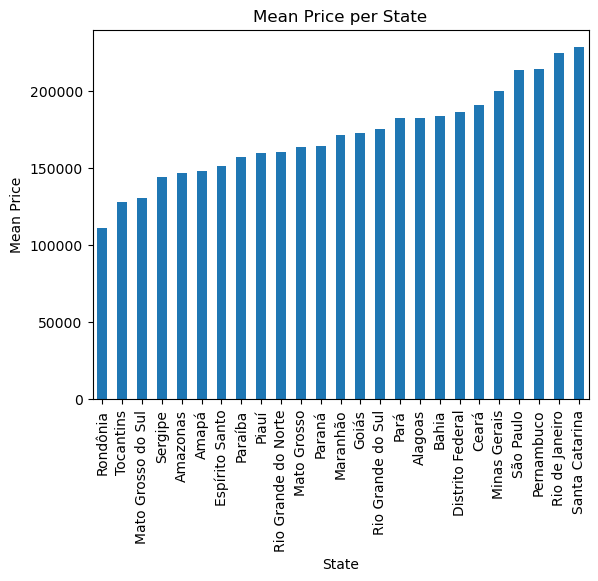

In [55]:
df.groupby("state")["price_usd"].mean().sort_values().plot(kind='bar', xlabel="State", ylabel="Mean Price", title="Mean Price per State")

In [ ]:
Appears Santa Catarina is has the most expensive property prices. However, mean prices might be misleading

<Axes: title={'center': 'Mean Area_M^2 per State'}, xlabel='State', ylabel='Mean Area^m2'>

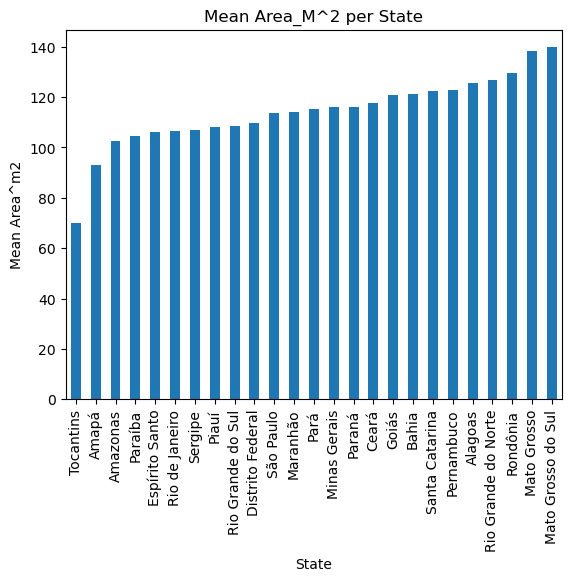

In [56]:
df.groupby("state")["area_m2"].mean().sort_values().plot(kind='bar', xlabel="State", ylabel="Mean Area^m2", title="Mean Area_M^2 per State")

In [57]:
df["price_per_m2"] = df["price_usd"]/df["area_m2"]

In [58]:
df.head()

,property_type,state,region,lat,lon,area_m2,price_usd,price_per_m2
0,apartment,Pernambuco,Northeast,-8.134204,-34.906326,72.0,129850.463950,1803.478666
1,apartment,Pernambuco,Northeast,-8.126664,-34.903924,136.0,265958.786834,1955.579315
2,apartment,Pernambuco,Northeast,-8.125550,-34.907601,75.0,93867.799373,1251.570658
3,apartment,Pernambuco,Northeast,-8.120249,-34.895920,187.0,265958.786834,1422.239502
4,apartment,Pernambuco,Northeast,-8.142666,-34.906906,80.0,145495.097179,1818.688715


<Axes: title={'center': 'Price per m^2 by State'}, xlabel='State', ylabel='Price per m^2'>

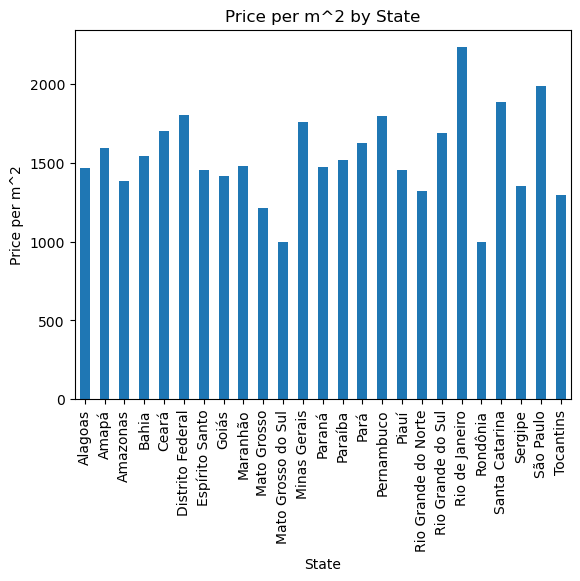

In [62]:
df.groupby("state")["price_per_m2"].mean().sort_values("").plot(kind='bar', xlabel="State", ylabel="Price per m^2", title="Price per m^2 by State")